<a href="https://colab.research.google.com/github/fralfaro/MAT281_2024/blob/main/docs/lectures/machine_learning/ns_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# No supervisado II

## Reducción de Dimensionalidad

<img src="https://lh7-rt.googleusercontent.com/docsz/AD_4nXdNbikuP2M9fZrxF_hlCeBRE4KqzZlqDjU9qfUlLIxAXXPAorOSe0VFYL3hMIyihU2NwtdfwY0QcKNS5XsCbCYrC0DUyA6tBAUtGfPGJQMI2jQeYb7u-GhlzjsG6GDqzJ28G66Fqzj6-jw8rTDtFeXtK8A?key=zkoZqw4rJh7cg9cG7yYpEA" width = "600" align="center"/>


La **reducción de dimensionalidad** es el proceso de reducir el número de variables en un conjunto de datos, dividiéndose en dos enfoques principales: **selección de características** y **extracción de características**. Este paso es útil en el preprocesamiento para algoritmos de aprendizaje supervisado en clasificación y regresión.

No existe un único algoritmo de reducción de dimensionalidad adecuado para todos los casos. Es recomendable experimentar con varios métodos y configuraciones para encontrar el mejor ajuste a cada conjunto de datos.

### Principales Métodos de Reducción de Dimensionalidad

1. **Métodos de Álgebra Lineal**: Utilizan factorizaciones matriciales para reducir la dimensionalidad. Entre los más comunes están:
   - Análisis de Componentes Principales (PCA)
   - Descomposición en Valores Singulares (SVD)
   - Factorización de Matriz No Negativa (NMF)

2. **Métodos de Aprendizaje No Lineal**: Proyectan los datos en dimensiones inferiores, capturando las características más relevantes. Ejemplos populares incluyen:
   - Isomap Embedding
   - Locally Linear Embedding (LLE)
   - Multidimensional Scaling (MDS)
   - Spectral Embedding
   - t-distributed Stochastic Neighbor Embedding (t-SNE)

Cada uno de estos algoritmos aborda el problema de la reducción de dimensionalidad desde una perspectiva distinta, y su efectividad depende de la estructura de los datos. Debido a la relevancia de PCA en machine learning, a continuación se dará una explicación detallada de este método y una breve reseña de los demás.

## Análisis de Componentes Principales (PCA)



El **Análisis de Componentes Principales (PCA)** es un método de reducción de dimensionalidad basado en álgebra lineal, que transforma los datos originales en un nuevo sistema de coordenadas. Este método busca capturar la mayor variabilidad posible en los datos mediante una serie de componentes principales ortogonales (no correlacionadas entre sí). 

**Conceptos Clave**

1. **Componentes Principales**: Son combinaciones lineales de las variables originales que maximizan la varianza. La primera componente principal (PC1) es la dirección de mayor variabilidad en los datos, la segunda (PC2) es ortogonal a la primera y captura la siguiente mayor variabilidad, y así sucesivamente.

2. **Varianza Explicada**: Cada componente principal explica una cierta proporción de la varianza total de los datos. En general, se retienen los primeros componentes que capturan la mayor parte de la varianza, reduciendo el número de dimensiones sin perder demasiada información.

3. **Autovectores y Autovalores**: Los componentes principales se obtienen a partir de los **autovectores** y **autovalores** de la matriz de covarianza o matriz de correlación. Los autovectores indican la dirección de cada componente, y los autovalores representan la cantidad de varianza explicada por cada uno.

**Algoritmo de PCA**

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg" width = "600" align="center"/>


El proceso para calcular PCA es el siguiente:

1. **Estandarización**: Se centran los datos restando la media de cada variable (opcional, pero recomendado cuando las variables están en distintas escalas).
2. **Cálculo de la Matriz de Covarianza**: Esta matriz muestra cómo varían conjuntamente las variables.
3. **Cálculo de Autovectores y Autovalores**: A partir de la matriz de covarianza, se calculan los autovectores y autovalores que determinan las direcciones y magnitudes de los componentes principales.
4. **Selección de Componentes**: Se eligen los componentes con los autovalores más altos, que explican la mayor parte de la varianza.
5. **Transformación**: Los datos se proyectan en el subespacio definido por los componentes seleccionados.

**Aplicaciones y Ventajas**

PCA es ampliamente utilizado en problemas donde se desea reducir la dimensionalidad sin perder demasiada información, especialmente en análisis exploratorio de datos, visualización en 2D o 3D y preprocesamiento en modelos de machine learning. Además, al eliminar redundancia y reducir el ruido en los datos, PCA mejora la eficiencia de los algoritmos y ayuda a evitar el sobreajuste.


### Aplicación

El método Principal Components Regression PCR consiste en ajustar un modelo de regresión lineal por mínimos cuadrados empleando como predictores las componentes generadas a partir de un Principal Component Analysis (PCA). De esta forma, con un número reducido de componentes se puede explicar la mayor parte de la varianza de los datos.



In [ ]:
# Paso 1: Generación y Visualización de los Datos

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generar un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=2, random_state=0)

# Crear un DataFrame para los datos
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])

print("Primeras filas del conjunto de datos:")
df.head()


Primeras filas del conjunto de datos:


,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5
0,2.204750,-0.334520,1.399043,0.833146,2.719191
1,0.295798,0.472396,-2.525445,-2.318118,-0.626782
2,-0.351001,-0.056448,-0.019186,0.029980,-0.310719
3,0.592100,0.597044,0.609850,0.636446,0.322715
4,0.423579,1.440724,1.594888,1.835560,-0.177855


In [ ]:
# Paso 2: Estandarización de los Datos

from sklearn.preprocessing import StandardScaler

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [ ]:
# Paso 3: Cálculo de PCA

from sklearn.decomposition import PCA

# Crear el modelo PCA y ajustar a los datos
pca = PCA(n_components=2)  # Seleccionamos 2 componentes principales
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los componentes principales
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
print("\nComponentes principales:")
df_pca.head()


Componentes principales:


,PC1,PC2
0,1.063786,1.824279
1,-0.070542,-1.746996
2,-0.649552,-0.038076
3,-0.500271,0.769537
4,-1.312940,1.521411



Varianza explicada por cada componente principal:
[0.48406871 0.40926938]


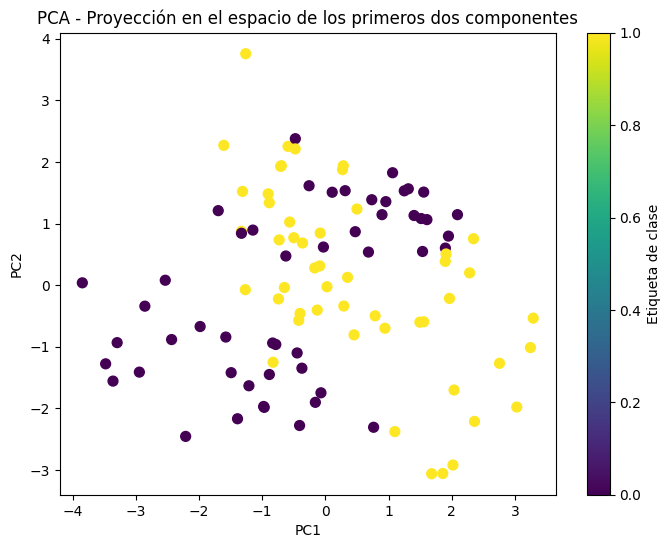

In [ ]:
# Paso 4: Interpretación de los Resultados

# Mostrar la varianza explicada por cada componente
print("\nVarianza explicada por cada componente principal:")
print(pca.explained_variance_ratio_)

# Visualización de los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=y, cmap='viridis', s=50)
plt.title("PCA - Proyección en el espacio de los primeros dos componentes")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar(label='Etiqueta de clase')
plt.show()


La gráfica muestra cómo se distribuyen los datos en el espacio de los componentes principales, revelando patrones que no eran obvios en el espacio original de cinco dimensiones. Los valores de varianza explicada ayudan a entender qué porcentaje de la variabilidad original ha sido conservada en los dos primeros componentes.

Para mostraremos la suma de la varianza explicada para diferentes cantidades de componentes (2, 3, 4 y 5), puedes ajustar el modelo PCA para cada uno de esos casos y sumar la varianza explicada por los componentes seleccionados.

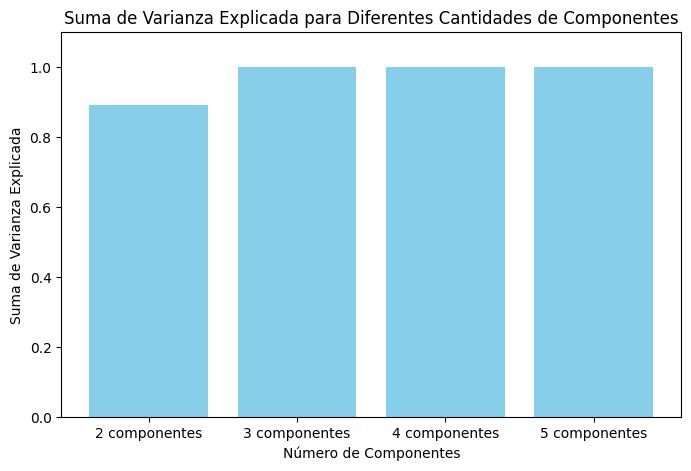

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generar un conjunto de datos sintético
X, y = make_classification(n_samples=100, n_features=5, n_informative=3, n_redundant=2, random_state=0)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la suma de varianza explicada para diferentes cantidades de componentes
suma_varianza_explicada = {}
for n in range(2, 6):
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    suma_varianza = sum(pca.explained_variance_ratio_)
    suma_varianza_explicada[f'{n} componentes'] = suma_varianza

# Convertir los resultados a un DataFrame para graficar
df_varianza = pd.DataFrame(list(suma_varianza_explicada.items()), columns=['Componentes', 'Suma de Varianza Explicada'])

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(df_varianza['Componentes'], df_varianza['Suma de Varianza Explicada'], color='skyblue')
plt.title("Suma de Varianza Explicada para Diferentes Cantidades de Componentes")
plt.xlabel("Número de Componentes")
plt.ylabel("Suma de Varianza Explicada")
plt.ylim(0, 1.1)
plt.show()

Esto te permite visualizar cómo aumenta la varianza explicada al agregar más componentes, facilitando la elección del número adecuado de componentes en función de la cantidad de información que se desea conservar.



> **Nota**: Para obtener más información sobre el Análisis de Componentes Principales (PCA), puedes consultar el siguiente artículo: ["A Tutorial on Principal Component Analysis" de Jonathon Shlens](https://www.cs.cmu.edu/~elaw/papers/pca.pdf).



## t-Distributed Stochastic Neighbor Embedding (t-SNE)

El **t-SNE** es un método de reducción de dimensionalidad y visualización que es particularmente útil para explorar datos de alta dimensionalidad en 2 o 3 dimensiones. A diferencia de otros métodos lineales como PCA, t-SNE es una técnica no lineal que conserva las relaciones locales entre los puntos, haciendo que los puntos similares en el espacio original permanezcan juntos en el espacio reducido.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*6RxnwhvOiykIPc5Y8OMzGA.png" width = "600" align="center"/>


**Conceptos Clave**

1. **Preservación de Vecindarios Locales**: t-SNE transforma los datos de alta dimensionalidad a una menor cantidad de dimensiones (generalmente 2 o 3) manteniendo la proximidad de los puntos que eran cercanos en el espacio original, ideal para descubrir patrones y estructuras locales.

2. **Distribuciones de Similaridad**:
   - En el espacio original, t-SNE calcula una distribución de probabilidad que mide la similitud de cada par de puntos, donde los puntos cercanos tienen alta probabilidad de pertenecer al mismo vecindario.
   - En el espacio reducido, se realiza un mapeo análogo, buscando que las relaciones de vecindad sean similares a las del espacio original.

3. **Función de Costo**: t-SNE minimiza una función de costo basada en la divergencia de Kullback-Leibler (KL-divergence) entre las distribuciones de similitud del espacio original y el reducido. Esto asegura que los puntos que eran similares en alta dimensionalidad permanezcan juntos en el espacio reducido.

**Parámetros Principales**

- **Perplexity**: Controla el equilibrio entre relaciones locales y globales. Valores bajos enfocan el análisis en relaciones locales, mientras que valores altos consideran estructuras más globales.
- **Learning Rate**: Determina el tamaño de los pasos en el proceso de optimización. Ajustes incorrectos pueden llevar a una mala representación de los datos.
- **Número de Iteraciones**: Afecta la convergencia del modelo. Generalmente, más iteraciones producen mejores resultados, pero aumentan el tiempo de cómputo.

**Aplicaciones**

t-SNE es especialmente útil en la visualización de datos complejos, como datos de texto, imágenes y biología (ej. análisis de expresiones génicas). Es ideal para explorar patrones y agrupamientos en datos que tienen relaciones no lineales, y es ampliamente utilizado en la visualización de resultados de modelos de aprendizaje profundo.



> **Nota**: Para obtener más información sobre t-Distributed Stochastic Neighbor Embedding (t-SNE), consulta el artículo ["Visualizing Data using t-SNE" de Laurens van der Maaten y Geoffrey Hinton](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf).



### Aplicación



Laurens van der Maaten destaca el uso de t-SNE en áreas como investigación climática, seguridad informática y bioinformática. t-SNE es útil para visualizar datos de alta dimensión, ayudando a explorar y evaluar la segmentación de datos antes o después de aplicar un modelo de clustering. Aunque no es un método de clustering, t-SNE revela separaciones en los datos que pueden guiar la selección de clusters.

A continuación, se compara visualmente PCA y t-SNE en el conjunto de datos `Digits`.

> **Datos**: El conjunto `Digits` contiene imágenes de dígitos manuscritos (10 clases) en matrices 8x8, generadas a partir de mapas de bits de 32x32. Este proceso de reducción de dimensionalidad da invariancia a pequeñas distorsiones.

Para el caso del método TSNE, se observa una diferenciación entre los grupos de estudios (aspecto que fue muy distinto al momento de analizar el método del PCA).

> **Observación**: Si bien se muestra donde el método TSNE logra ser superior en aspecto de reducción de dimensionalidad que el método PCA, no significa que para distintos experimientos se tengan los mismo resultados.

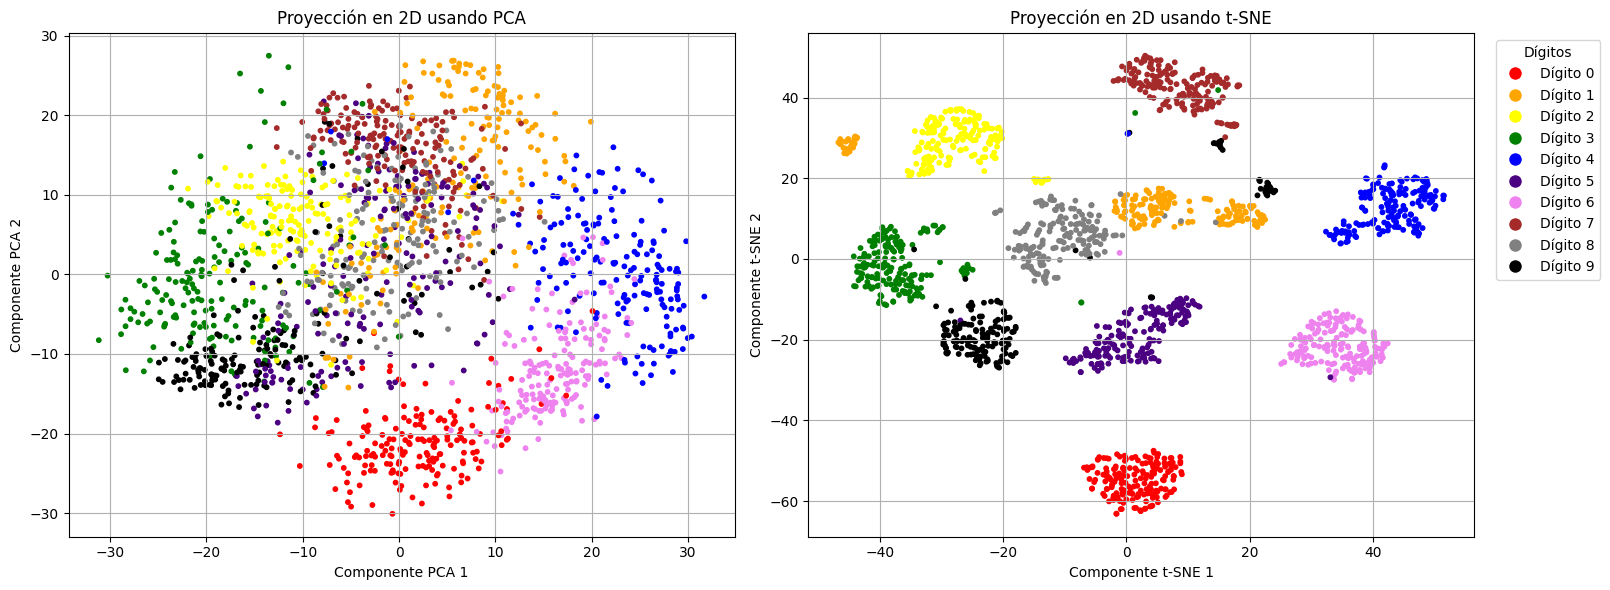

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from matplotlib.lines import Line2D


# Cargar el conjunto de datos Digits
digits = load_digits()
df = pd.DataFrame(digits['data'])
df['label'] = digits['target']

# Aplicar PCA para reducir a 2 componentes
pca = PCA(n_components=2)
df['PCA1'], df['PCA2'] = pca.fit_transform(digits['data']).T

# Aplicar t-SNE para reducir a 2 componentes
tsne = TSNE(n_components=2, random_state=0)
df['t-SNE1'], df['t-SNE2'] = tsne.fit_transform(digits['data']).T

# Lista de colores manual
colores = ['red', 'orange', 'yellow', 'green', 'blue', 'indigo', 'violet', 'brown', 'gray', 'black']

# Visualización de PCA
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
scatter = plt.scatter(df['PCA1'], df['PCA2'], c=[colores[i] for i in df['label']], s=10)
plt.title("Proyección en 2D usando PCA")
plt.xlabel("Componente PCA 1")
plt.ylabel("Componente PCA 2")
plt.grid(True)

# Visualización de t-SNE
plt.subplot(1, 2, 2)
scatter = plt.scatter(df['t-SNE1'], df['t-SNE2'], c=[colores[i] for i in df['label']], s=10)
plt.title("Proyección en 2D usando t-SNE")
plt.xlabel("Componente t-SNE 1")
plt.ylabel("Componente t-SNE 2")
plt.grid(True)

# Crear leyenda
leyenda = [Line2D([0], [0], marker='o', color='w', label=f'Dígito {i}', markerfacecolor=colores[i], markersize=10) for i in range(10)]

plt.legend(handles=leyenda, loc='upper right', bbox_to_anchor=(1.2, 1), title='Dígitos')


plt.tight_layout()
plt.show()

## Otros métodos de reducción de dimensionalidad

Existen otro métodos de reducción de dimencionalidad, a continuación se deja una referencia con la descripción de cada uno de estos algoritmos.


- **[Descomposición del valor singular (SVD)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html)**: Método de álgebra lineal que descompone una matriz en sus componentes principales, similar a PCA, pero adecuado para datos dispersos.

- **[Factorización de Matriz No Negativa (NMF)](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html)**: Aproxima una matriz mediante factores no negativos, lo que es útil en datos donde las características son no negativas (ej., frecuencias de palabras).

- **[Isomap Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)**: Método no lineal que conserva la estructura geométrica del espacio original, ideal para descubrir patrones en datos con geometría intrínseca compleja.

- **[Locally Linear Embedding (LLE)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.LocallyLinearEmbedding.html)**: Proyecta los datos en una dimensión menor manteniendo las relaciones locales entre puntos, usado en datos con estructuras no lineales.

- **[Multidimensional Scaling (MDS)](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html)**: Reduce dimensiones preservando las distancias entre puntos, utilizado para visualización en 2D o 3D.

- **[Spectral Embedding](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.SpectralEmbedding.html)**: Usa grafos para reducir dimensionalidad, adecuado para datos con clusters bien definidos o estructuras tipo grafo.



c:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\docs-PxIqdmp3-py3.10\lib\site-packages\sklearn\decomposition\_nmf.py:1759: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
c:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\docs-PxIqdmp3-py3.10\lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\docs-PxIqdmp3-py3.10\lib\site-packages\scipy\sparse\_index.py:108: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\Users\franc\AppData\Local\pypoetry\Cache\virtualenvs\docs-PxIqdmp3-py3.10\lib\site-packages\sklearn\manifold\_spectral_embedding.py:

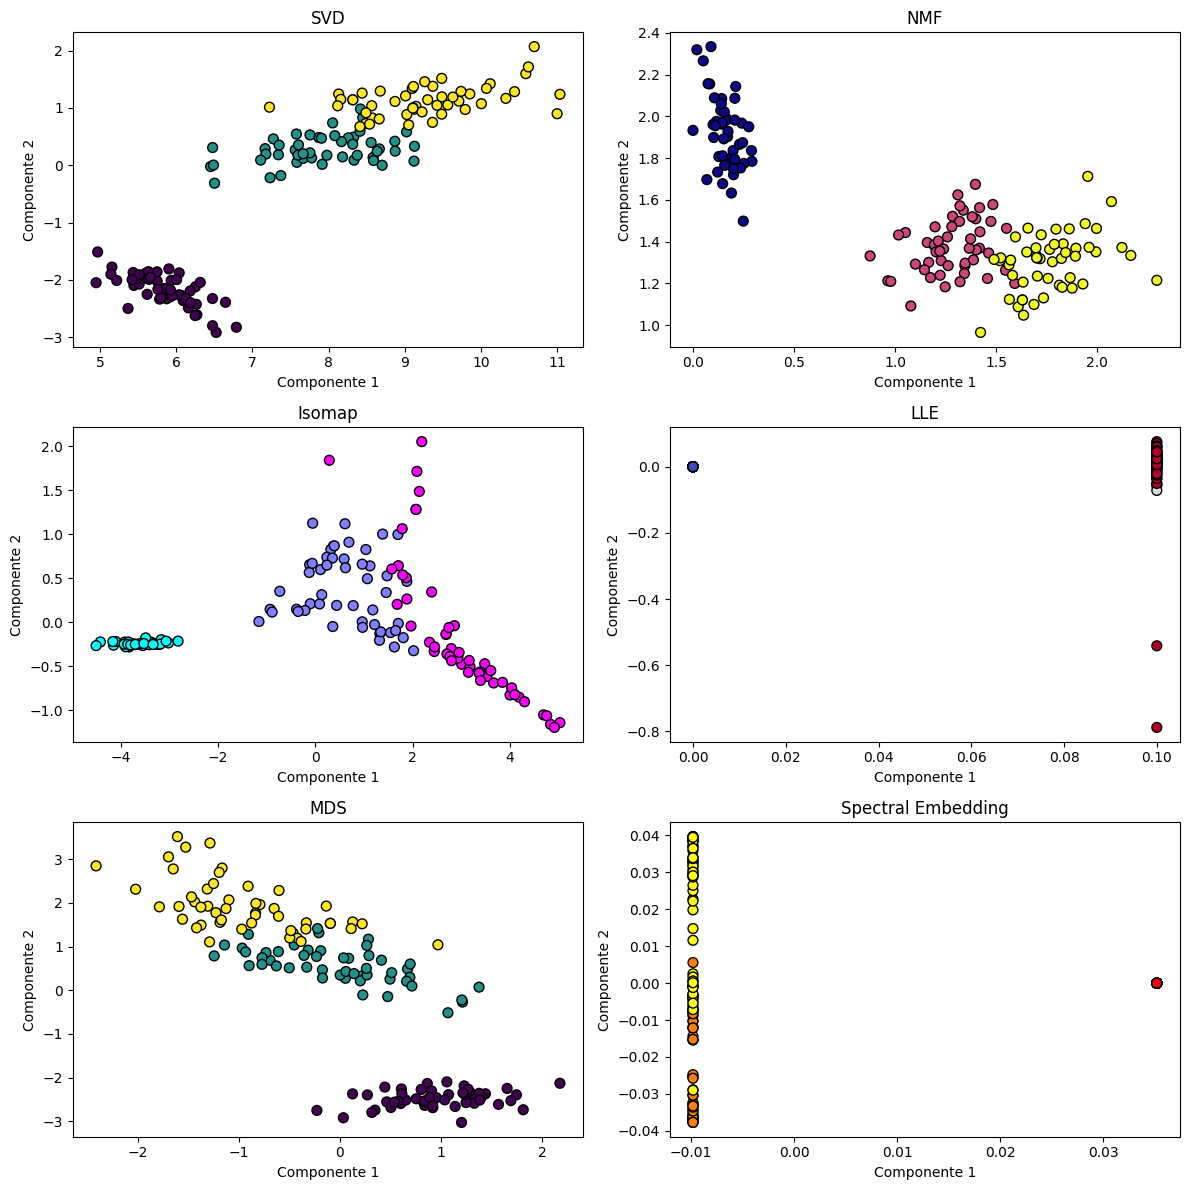

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding

# Cargar el conjunto de datos Iris
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Configuración para la visualización
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.ravel()

# Descomposición del Valor Singular (SVD)
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)
axes[0].scatter(X_svd[:, 0], X_svd[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
axes[0].set_title("SVD")

# Factorización de Matriz No Negativa (NMF)
nmf = NMF(n_components=2, init='random', random_state=0)
X_nmf = nmf.fit_transform(X)
axes[1].scatter(X_nmf[:, 0], X_nmf[:, 1], c=y, cmap='plasma', s=50, edgecolor='k')
axes[1].set_title("NMF")

# Isomap Embedding
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X)
axes[2].scatter(X_isomap[:, 0], X_isomap[:, 1], c=y, cmap='cool', s=50, edgecolor='k')
axes[2].set_title("Isomap")

# Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_components=2)
X_lle = lle.fit_transform(X)
axes[3].scatter(X_lle[:, 0], X_lle[:, 1], c=y, cmap='coolwarm', s=50, edgecolor='k')
axes[3].set_title("LLE")

# Multidimensional Scaling (MDS)
mds = MDS(n_components=2, random_state=0)
X_mds = mds.fit_transform(X)
axes[4].scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', s=50, edgecolor='k')
axes[4].set_title("MDS")

# Spectral Embedding
spectral = SpectralEmbedding(n_components=2, random_state=0)
X_spectral = spectral.fit_transform(X)
axes[5].scatter(X_spectral[:, 0], X_spectral[:, 1], c=y, cmap='autumn', s=50, edgecolor='k')
axes[5].set_title("Spectral Embedding")

# Ajustes finales para la visualización
for ax in axes:
    ax.set_xlabel("Componente 1")
    ax.set_ylabel("Componente 2")
plt.tight_layout()
plt.show()


## Referencias

1. [In Depth: Principal Component Analysis](https://www.aprendemachinelearning.com/comprende-principal-component-analysis/)
2. [Unsupervised dimensionality reduction](https://scikit-learn.org/stable/modules/unsupervised_reduction.html)